# 1. Imports

In [1]:
## Essenttial
import pandas   as pd
import warnings as wrg
from   IPython.display import Image
import pickle

from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler

## Owner
from SRLib.Nuter import nuter

## Chart pĺot
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot   as plt
import seaborn             as sns

# 2. Help Functions

## 2.1 Settings

In [8]:
sns.set( rc={'figure.figsize':( 38,13 )} )
#warings ignore
wrg.filterwarnings('ignore')

In [3]:
pd.set_option('display.float_format', lambda x :'%5f' %x)

# 3. Data Load | Cleaning

### 3.1 Data split ( Train | Validation )

In [35]:
#data = pd.read_csv( '../data/nuter.csv' )

In [33]:
#data_raw, ds_validation = nuter.stratified_split( data, 'isFraud', .40 )

In [6]:
#data_raw.to_csv( '../data/train.csv', index=False )
#ds_validation.to_csv( '../data/validation.csv', index=False )

### 3.2 Data train load

In [4]:
data_raw = pd.read_csv( '../data/train.csv' )

### 3.3 Rename Columns

In [5]:
data_raw = nuter.data_cleaner( data_raw )

# 4. EDA

## 4.1 General Analysis

### Dimensions

In [9]:
print( 'Dataset shape: {:,} rows, {} columns'.format( data_raw.shape[0], data_raw.shape[1] ) )

Dataset shape: 3,817,572 rows, 11 columns


### Fill NAs

In [10]:
data_raw.isna().sum()

step                0
type                0
amount              0
name_orig           0
old_balance_org     0
new_balance_orig    0
name_dest           0
old_balance_dest    0
new_balance_dest    0
is_fraud            0
is_flagged_fraud    0
dtype: int64

### General data analysis

In [6]:
display( data_raw[data_raw.is_fraud == 0].head( 4 ) )
display( data_raw[data_raw.is_fraud == 1].head(4) )

,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,376,CASH_OUT,53689.21,C252298639,537.52,0.0,C257281017,6989545.61,7043234.82,0,0
1,19,CASH_OUT,284172.35,C1647448870,10246.00,0.0,C571063338,215865.24,500037.59,0,0
2,227,CASH_OUT,18915.18,C1649362767,16743.00,0.0,C2067479100,0.00,18915.18,0,0
3,186,CASH_OUT,279143.18,C217215934,1594.00,0.0,C1235730818,78918.12,358061.30,0,0


,step,type,amount,name_orig,old_balance_orig,new_balance_orig,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
216,602,CASH_OUT,1976666.45,C286962871,1976666.45,0.0,C1066958378,0.00,1976666.45,1,0
362,626,CASH_OUT,44577.32,C259533000,44577.32,0.0,C2027781406,61298.80,105876.12,1,0
2373,501,CASH_OUT,534470.98,C1832180008,534470.98,0.0,C1558734299,741.07,535212.06,1,0
2414,261,TRANSFER,5039827.29,C60530886,5039827.29,0.0,C1454703841,0.00,0.00,1,0


In [20]:
display( data_raw.describe().T )
display( data_raw.select_dtypes( exclude = ['int64', 'float64'] ).describe().T )

,count,mean,std,min,25%,50%,75%,max
step,3817572.000000,243.360226,142.330166,1.000000,155.000000,239.000000,335.000000,743.000000
amount,3817572.000000,180152.312521,604776.330133,0.000000,13400.765000,74922.000000,208715.795000,92445516.640000
old_balance_orig,3817572.000000,834809.703085,2890418.663580,0.000000,0.000000,14215.000000,107392.000000,59585040.370000
new_balance_orig,3817572.000000,856009.440169,2926175.802938,0.000000,0.000000,0.000000,144364.450000,49585040.370000
old_balance_dest,3817572.000000,1100070.618596,3377759.022331,0.000000,0.000000,133017.420000,943434.485000,356015889.350000
new_balance_dest,3817572.000000,1224832.014771,3655399.653503,0.000000,0.000000,215179.925000,1112372.875000,356179278.920000
is_fraud,3817572.000000,0.001291,0.035906,0.000000,0.000000,0.000000,0.000000,1.000000
is_flagged_fraud,3817572.000000,0.000004,0.001915,0.000000,0.000000,0.000000,0.000000,1.000000


,count,unique,top,freq
type,3817572,5,CASH_OUT,1342586
name_orig,3817572,3814211,C2098525306,3
name_dest,3817572,1799042,C1590550415,73


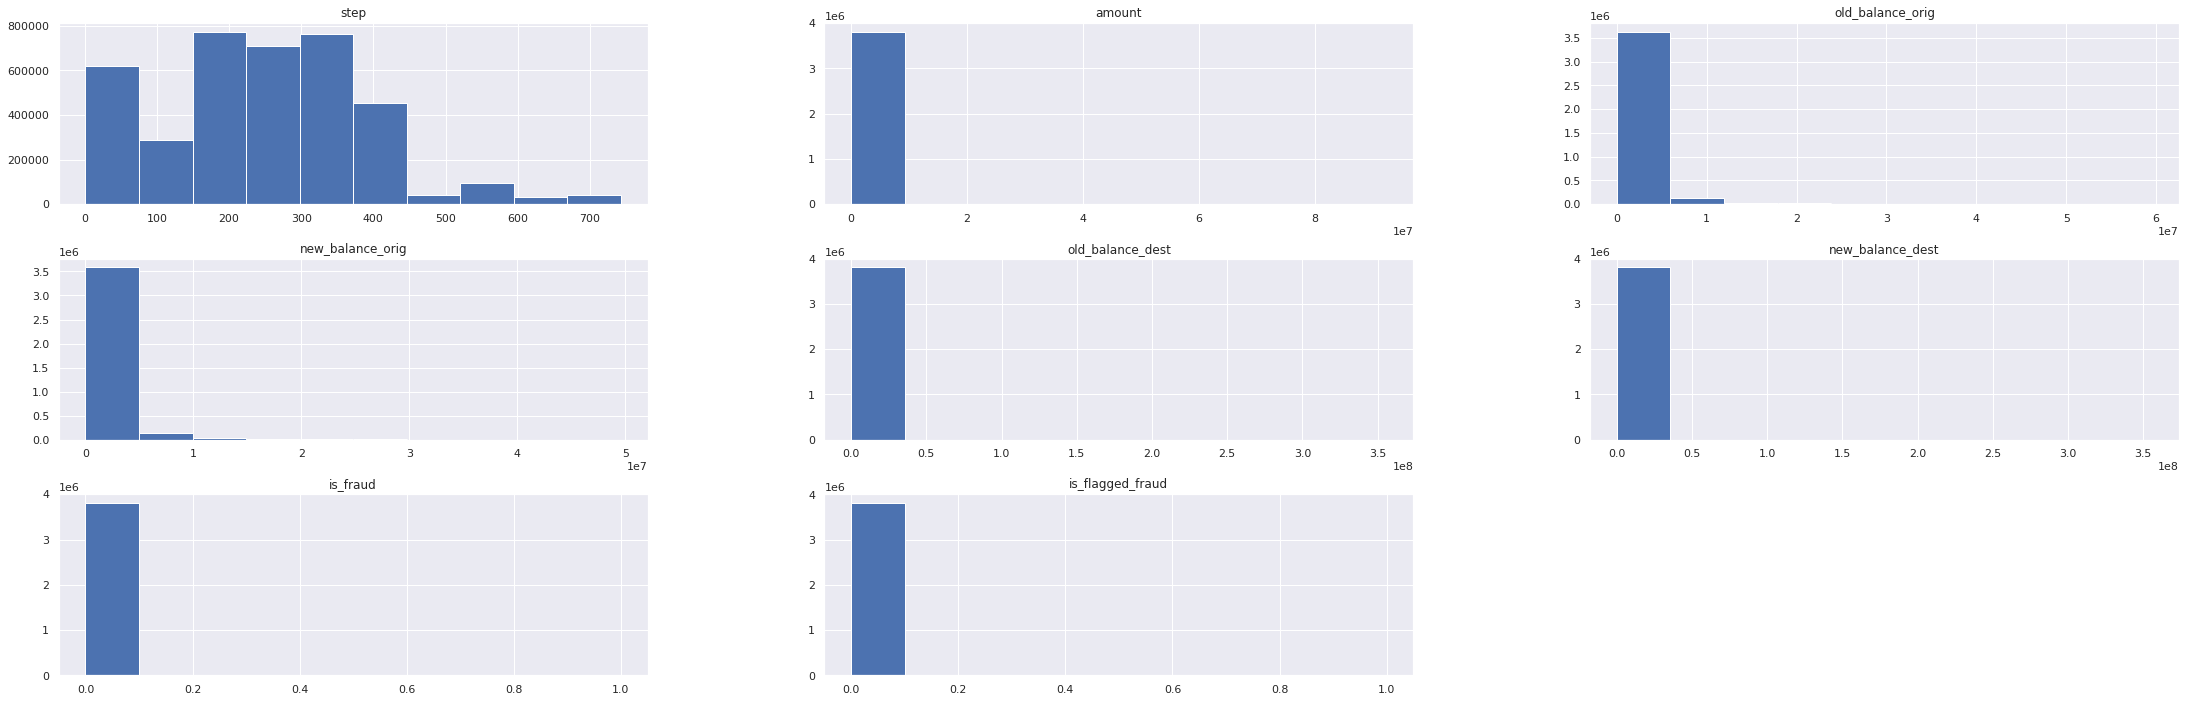

In [7]:
data_raw.hist( figsize = ( 38,12 ) );

In [10]:
data_raw.dtypes


step                  int64
type                 object
amount              float64
name_orig            object
old_balance_orig    float64
new_balance_orig    float64
name_dest            object
old_balance_dest    float64
new_balance_dest    float64
is_fraud              int64
is_flagged_fraud      int64
dtype: object

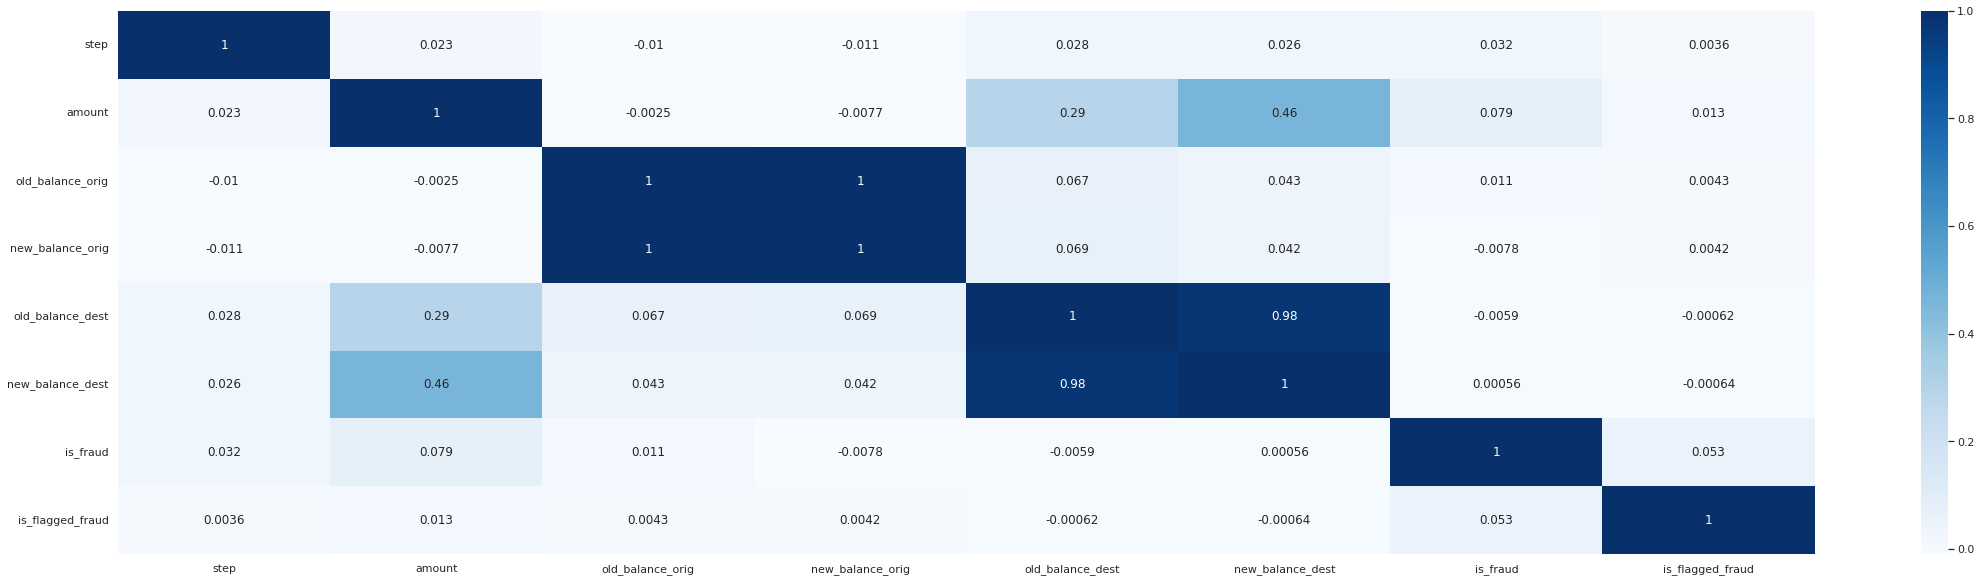

In [10]:
sns.heatmap(
    data_raw.corr( method = 'pearson' ),
    annot = True,
    cmap  = 'Blues'
);

## 4.2 Mind Map & Analysis of possible hypotheses

### Mind Map

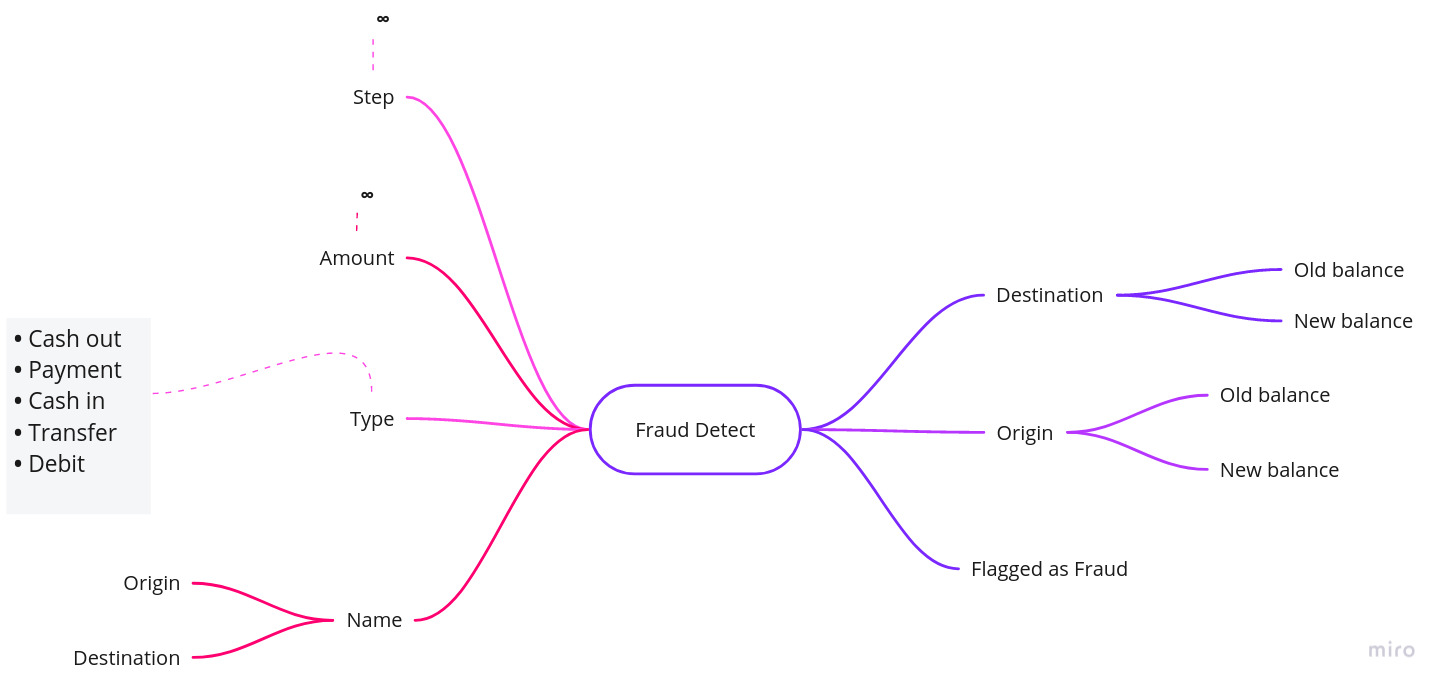

In [ ]:
Image( '../img/mind_map.jpg' )

### Hypotheses 

##### Univariate
1. C1590550415, aparece em 72 registros. Analisar de maneira mais detalhada (name_dest);

##### Bivariate 
1. O maior fluxo de fraudes, deve ocorrer por meio de Saques para que não hajam rastros (type);

2. Fraudes visam maiores valores (amount);

3. Contas de origem, tendem a ser zeradas em fraudes (new_balance_orig);

4. Contas marcadas como fraude, sempre são fraudes (flagged_fraud);



## 4.3 Univariate data analysis

### | Is_fraud |&| is_flagged_fraud

Os registros fraudulentos correspondem a 0.13% do conjunto total de dados


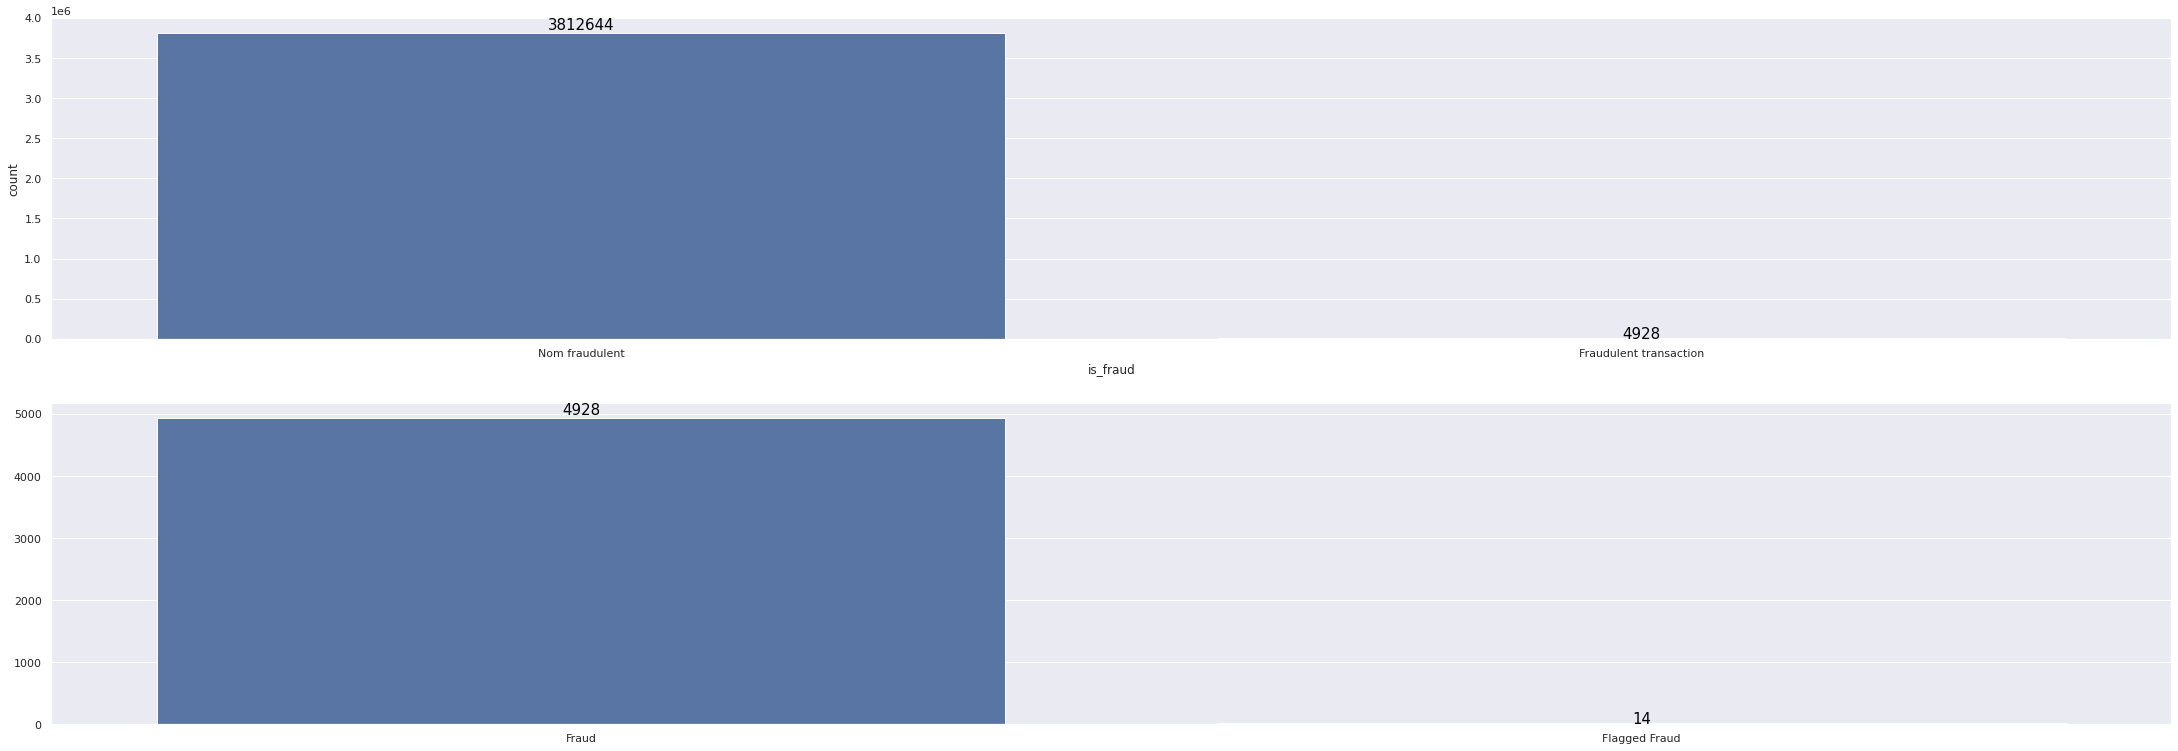

In [42]:
print( f"Os registros fraudulentos correspondem a {( data_raw[data_raw.is_fraud == 1].is_fraud.count() * 100 / data_raw.is_fraud.count() ) :.2f}% do conjunto total de dados" )

plt.subplot( 2,1,1 )

## First graph
ax = sns.countplot( data_raw.is_fraud );
ax.set_xticklabels( [ "Nom fraudulent", "Fraudulent transaction" ] );
nuter.plot_values_vbar( ax )


plt.subplot( 2,1,2 )

##Second Graph
ax1 = sns.barplot(   x = ['Fraud', 'Flagged_fraud'], y = [data_raw.is_fraud[data_raw.is_fraud == 1].count() , data_raw.is_flagged_fraud[data_raw.is_flagged_fraud == 1].count()] );
ax1.set_xticklabels( [ "Fraud", "Flagged Fraud" ] );
nuter.plot_values_vbar( ax1 )



### Type

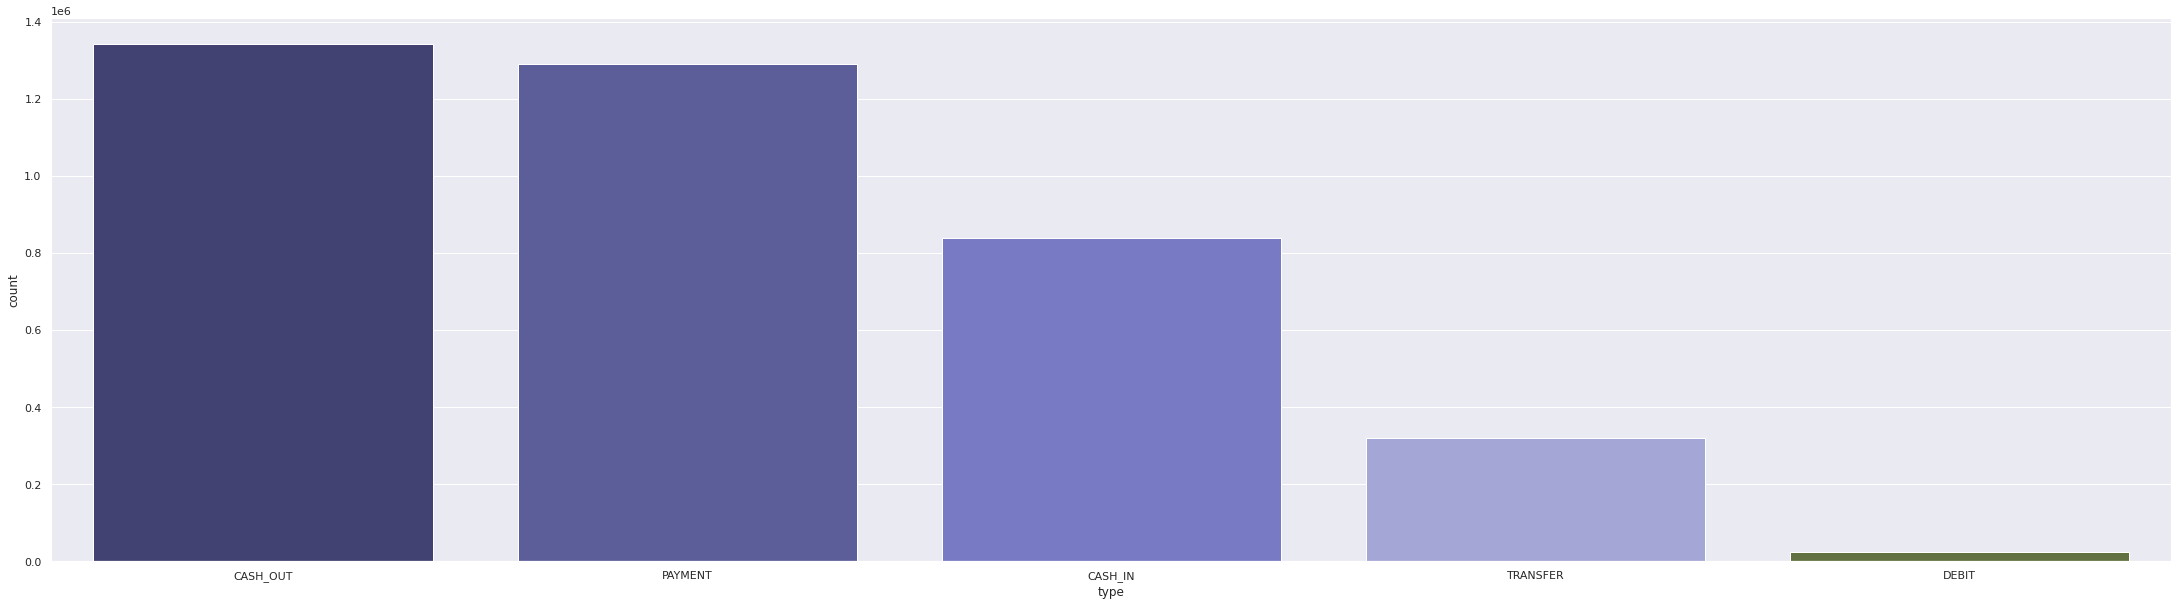

In [20]:
sns.countplot( 
    data_raw.type,
    order = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    palette= 'tab20b'
);

### name_dest (C1590550415) 

In [24]:
data_raw.is_fraud[data_raw.name_dest == 'C1590550415'].unique()

array([0])

## 4.4 Bivariate data analysis

### 1. O maior fluxo de fraudes, deve ocorrer por meio de Saques para que não hajam rastros

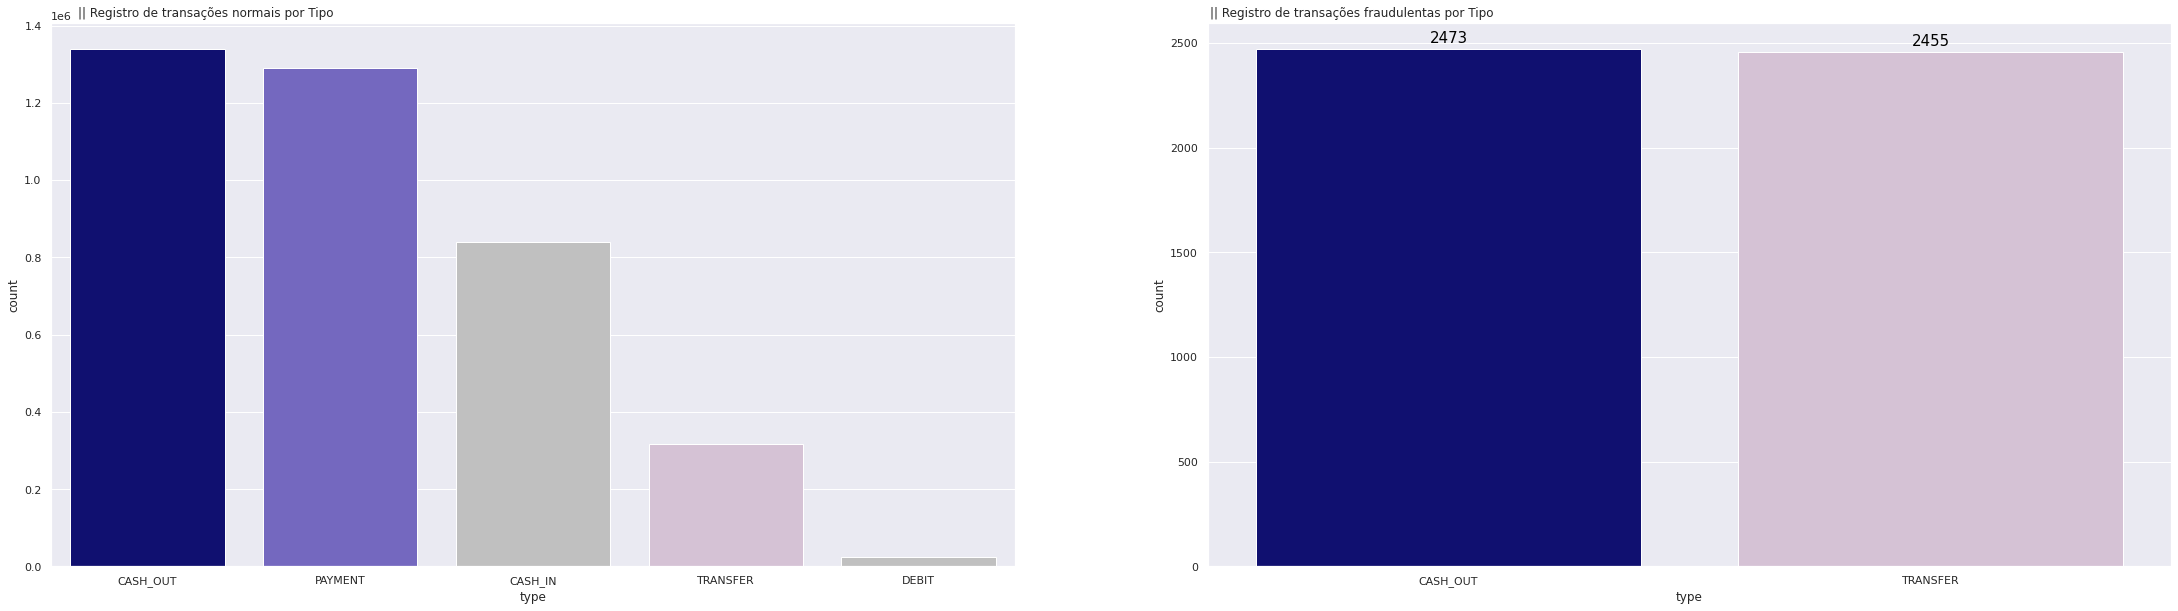

In [40]:
grid = GridSpec( 1,2 )

## First Plot
plt.subplot( grid[0,0] )
ax = sns.countplot(
    data_raw.type[data_raw.is_fraud == 0],
    order   = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    palette = ['navy', 'slateblue', 'silver', 'thistle', 'silver']
);
plt.title( '|| Registro de transações normais por Tipo', x = 0.16 )

##Second Plot
plt.subplot( grid[0,1] )
ax1 = sns.countplot(
    data_raw.type[data_raw.is_fraud == 1],
    palette = ['navy', 'thistle']
)
nuter.plot_values_vbar( ax1 )
plt.title( '|| Registro de transações fraudulentas por Tipo', x = 0.15 );

### 2. Fraudes visam maiores valores

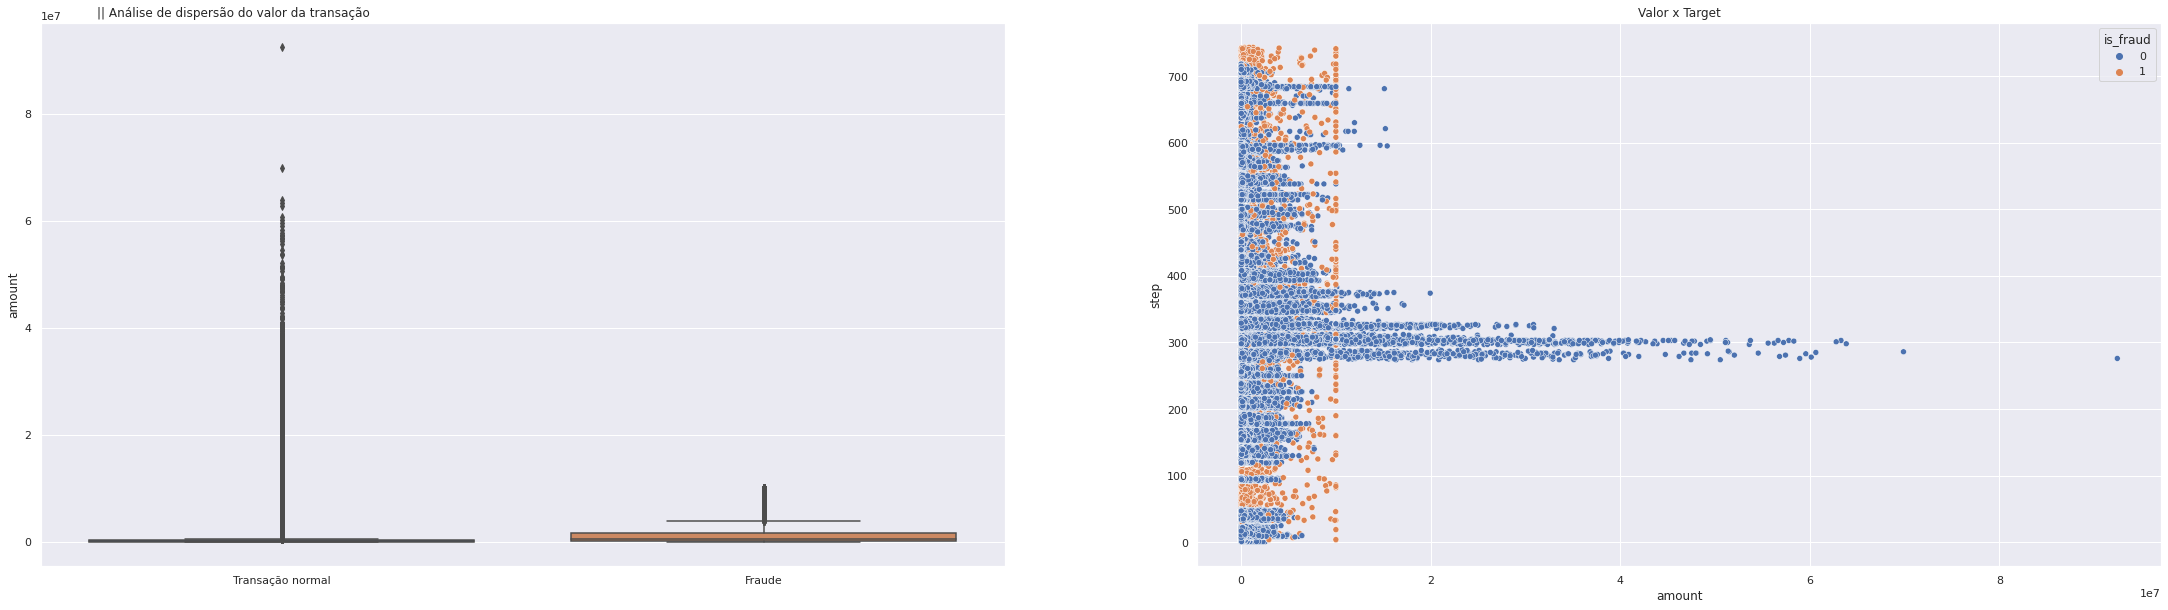

In [24]:
grid = GridSpec(1,2)
## First graph
plt.subplot( grid[0,0] );
ax = sns.boxplot(
    data=data_raw,
    x = data_raw.is_fraud,
    y = data_raw.amount
);
plt.xlabel( '' );
ax.set_xticklabels( ['Transação normal', 'Fraude'] );
plt.title('|| Análise de dispersão do valor da transação', x=0.2);

##Second graph
plt.subplot( grid[0,1] );
ax1 = sns.scatterplot(
    data = data_raw,
    x = 'amount', y = 'step', hue = 'is_fraud'
);
plt.title( 'Valor x Target' );


In [50]:
print(f" Nota: Ao analisar o gráfico, nota-se uma divisão retilínea onde {data_raw.amount[( data_raw.is_fraud == 1 ) & ( data_raw.amount == 10000000 ) ].count()} registro de fraude, tem exatamente esse mesmo valor de 'amount'." )

 Nota: Ao analisar o gráfico, nota-se uma divisão retilínea nos no 'amount' onde 178 registro de fraude, tem exatamente esse mesmo valor.


### 3. Contas de origem, tendem a ser zeradas em fraudes ;

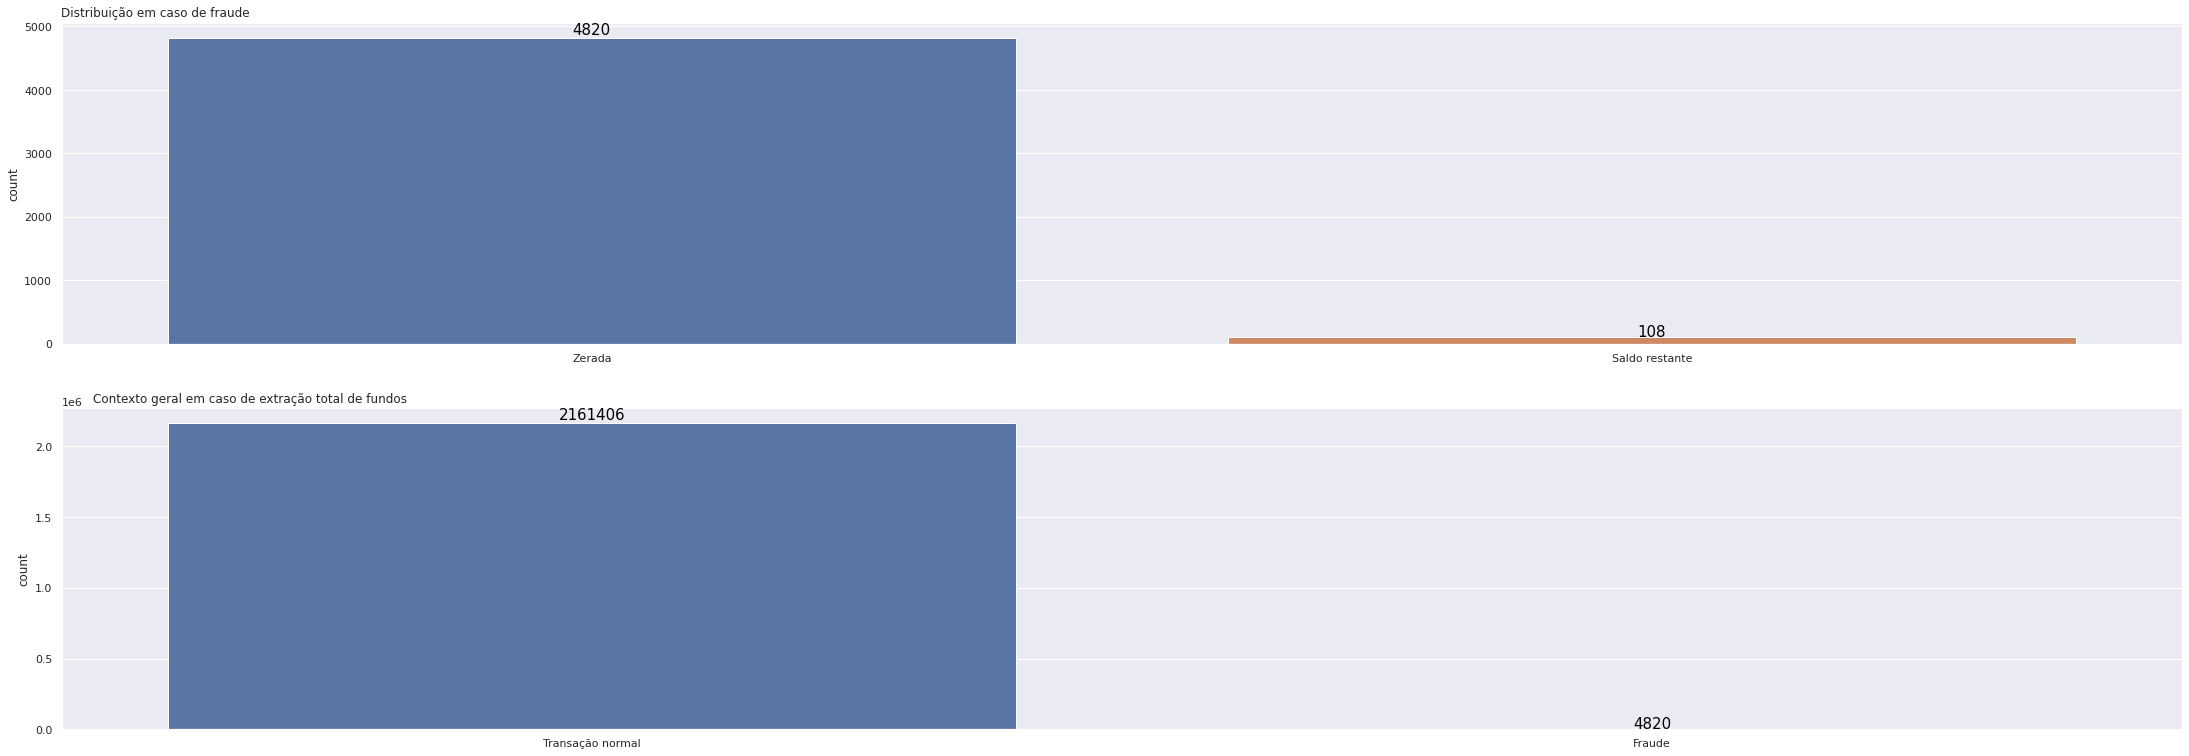

In [133]:
grid = GridSpec( 2,1 )

##First graph
plt.subplot( grid[0,0] )
temp = data_raw.loc[data_raw.is_fraud == 1, 'new_balance_orig']
temp = temp.apply( lambda x : 'Zerada' if x == 0 else 'Saldo restante' )
ax = sns.countplot(
    temp
)
nuter.plot_values_vbar( ax )
plt.xlabel( '' )
plt.title( 'Distribuição em caso de fraude' , x = 0.044);

##Second graph
plt.subplot( grid[1,0] )
temp = data_raw[(data_raw.new_balance_orig == 0 )]  
ax1 = sns.countplot(
    temp.is_fraud
);
ax1.set_xticklabels( ['Transação normal', 'Fraude'] )
nuter.plot_values_vbar( ax1 )
plt.title( 'Contexto geral em caso de extração total de fundos' , x = 0.089);
plt.xlabel( '' );




### 4. Contas marcadas como fraude, sempre são fraudes

Apesar de verdadeiro, foram marcadas apenas 14 de 4928 transações fraudulentas


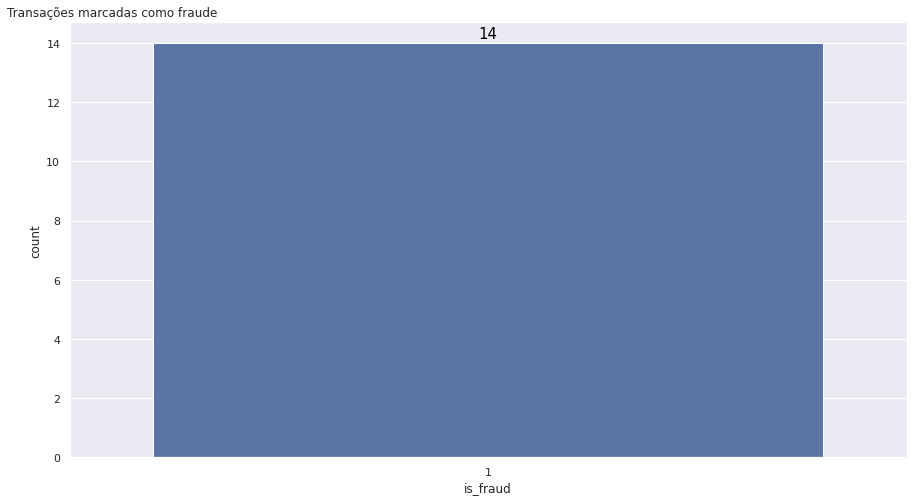

In [13]:
print( f'Apesar de verdadeiro, foram marcadas apenas {data_raw[data_raw.is_flagged_fraud == 1].is_fraud.count()} de {data_raw[data_raw.is_fraud == 1].is_fraud.count()} transações fraudulentas' ),
ax = sns.countplot(
    data_raw[data_raw.is_flagged_fraud == 1].is_fraud
);
nuter.plot_values_vbar( ax )
plt.title( 'Transações marcadas como fraude', x = 0.051 );

## CHECKPOINT

In [9]:
df = data_raw[( data_raw.type == 'CASH_OUT') | ( data_raw.type == 'TRANSFER' )]

In [60]:
df = df.reset_index( drop = True )

In [156]:
pickle.dump( df, open( '../data/pickle/df.sav' , 'wb') )

In [5]:
df = pickle.load( open( '../data/pickle/df.sav', 'rb' ) )

### Data Informations

Os registros fraudulentos correspondem a 0.30% do conjunto total de dados


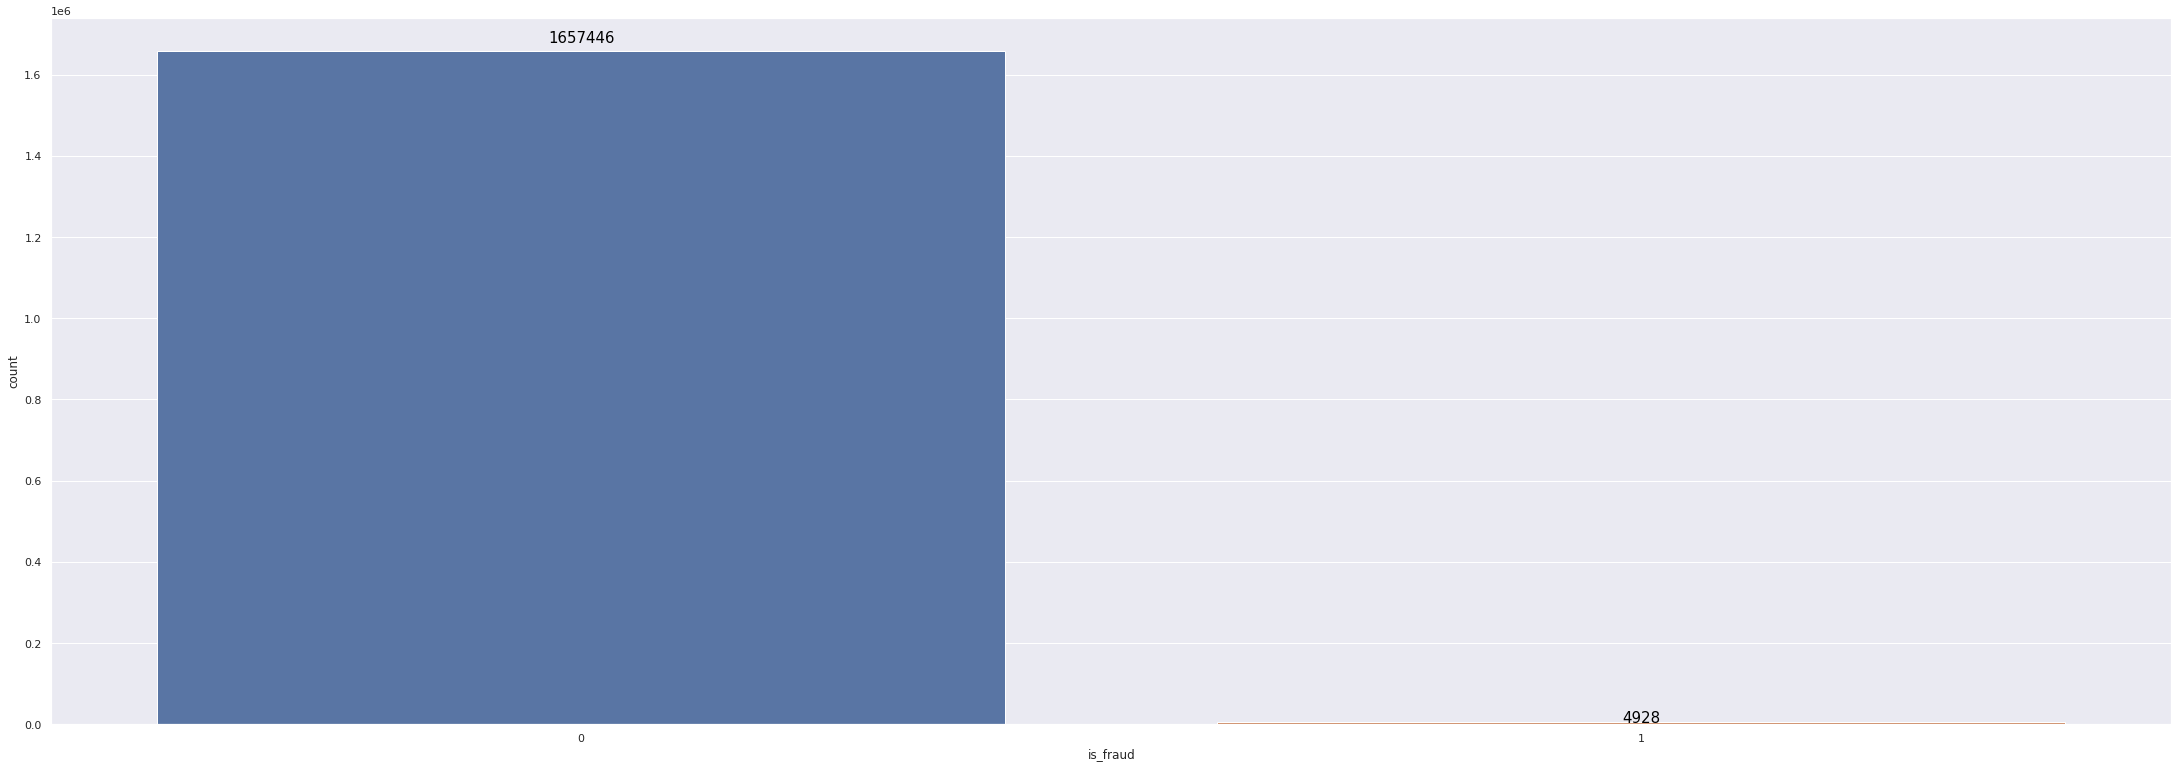

In [41]:
print( f"Os registros fraudulentos correspondem a {( df[df.is_fraud == 1].is_fraud.count() * 100 / df.is_fraud.count() ) :.2f}% do conjunto total de dados." )
ax = sns.countplot(
    df.is_fraud
);
nuter.plot_values_vbar( ax )

    Antes da extração das transações com 'type' onde não haviam fraudes, o percentual de transações fraudulentas com relação ao conjunto total de dados era de ~ 0.13% passando para ~ 0.30%. Melhorando assim, mesmo que em pequena escala, o desbalanceamento dos dados.

In [11]:
### Encoding
ohe_type   = OneHotEncoder()
type_encod = ohe_type.fit_transform( 
    df.type.values.reshape( -1,1 )
 ).toarray()

### Save Model
pickle.dump( type_encod, open( '../models/ohe_type.sav' , 'wb') )

#Data create with ecodings
temp = pd.DataFrame( {'cash_out' : type_encod[:, 0], 'transfer' : type_encod[:, 1]} )
df_temp = pd.concat ( [df, temp], axis=1 )
df_temp.drop( columns = 'type', inplace = True )

# 5. Data Encoding/Normalization

## 5.1 Categorical Encoding

In [105]:
sns.set( rc={'figure.figsize':( 15,5 )} )

### type

In [77]:
### Encoding
ohe_type   = OneHotEncoder()
type_encod = ohe_type.fit_transform( 
    df.type.values.reshape( -1,1 )
 ).toarray()

### Save Model
pickle.dump( type_encod, open( '../models/ohe_type.sav' , 'wb') )

#Data create with ecodings
temp = pd.DataFrame( {'cash_out' : type_encod[:, 0], 'transfer' : type_encod[:, 1]} )
df_temp = pd.concat ( [df, temp], axis=1 )
df_temp.drop( columns = 'type', inplace = True )

## 5.2 Numerical Encoding

### amount

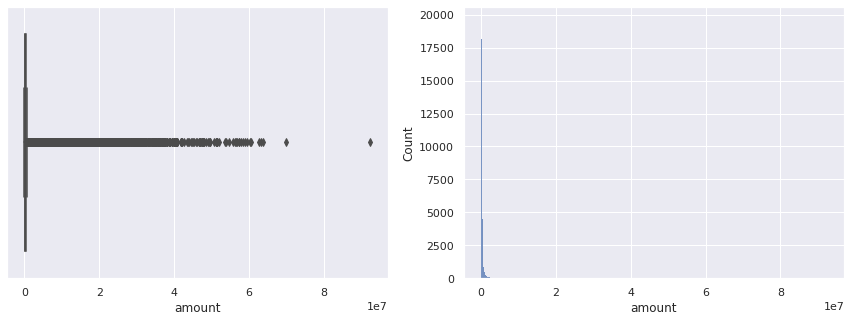

In [128]:
grid =  GridSpec(1,2)

plt.subplot( grid[0,0] )
sns.boxplot( df.amount );

plt.subplot( grid[0,1] )
sns.histplot( df.amount );

In [142]:
ss_amount = StandardScaler(  )
amount_ss = ss_amount.fit_transform( df.amount.values.reshape( -1,1 ) )
df_temp.amount = amount_ss

pickle.dump( ss_amount, open( '../models/ss_amount.sav' , 'wb') )


### old_balance_orig

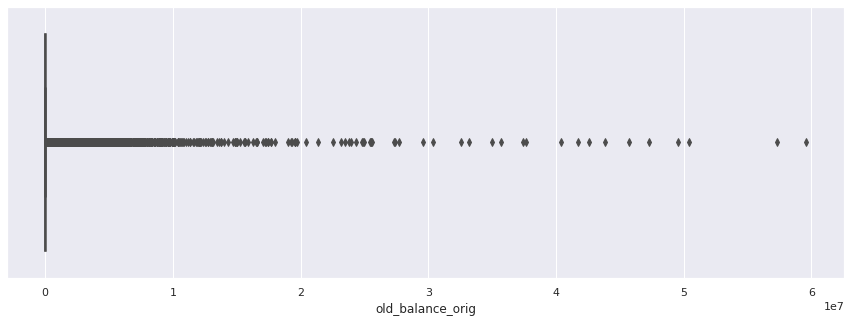

In [135]:
sns.boxplot( df.old_balance_orig );

In [139]:
ss_old_balance_orig = StandardScaler(  )
old_balance_origi_ss = ss_old_balance_orig.fit_transform( df.old_balance_orig.values.reshape( -1,1 ) )
df_temp.old_balance_orig = old_balance_origi_ss

pickle.dump( ss_old_balance_orig, open( '../models/ss_old_balance_orig.sav' , 'wb') )

### new_balance_orig

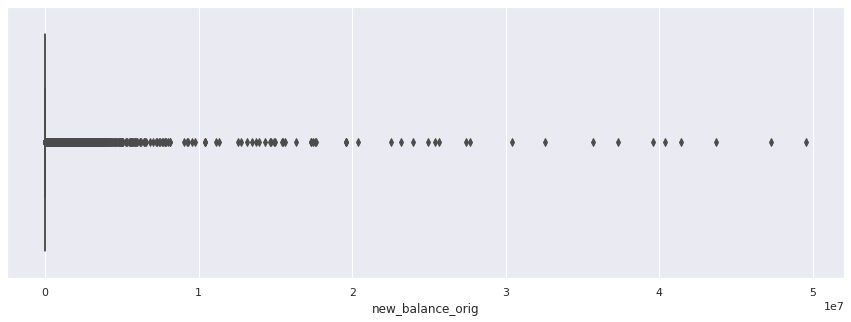

In [138]:
sns.boxplot( df.new_balance_orig );

In [143]:
ss_new_balance_orig = StandardScaler(  )
new_balance_orig_ss = ss_new_balance_orig.fit_transform( df.new_balance_orig.values.reshape( -1,1 ) )
df_temp.new_balance_orig = new_balance_orig_ss

pickle.dump( ss_new_balance_orig, open( '../models/ss_new_balance_orig.sav' , 'wb') )

### old_balance_dest

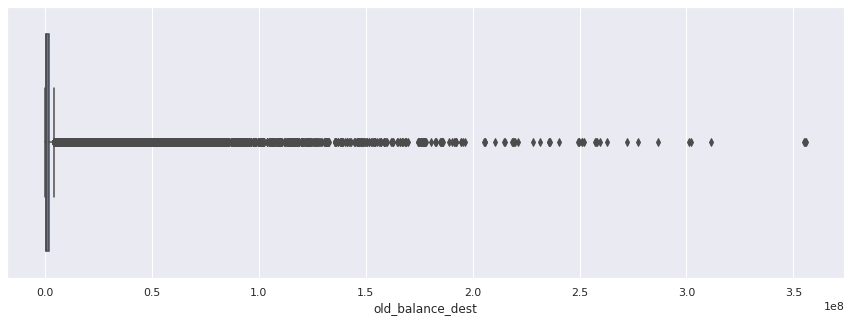

In [145]:
sns.boxplot( df.old_balance_dest );

In [146]:
ss_old_balance_dest = StandardScaler(  )
old_balance_dest_ss = ss_old_balance_dest.fit_transform( df.old_balance_dest.values.reshape( -1,1 ) )
df_temp.old_balance_dest = old_balance_dest_ss

pickle.dump( ss_old_balance_dest, open( '../models/ss_old_balance_dest.sav' , 'wb') )

### new_balance_dest	

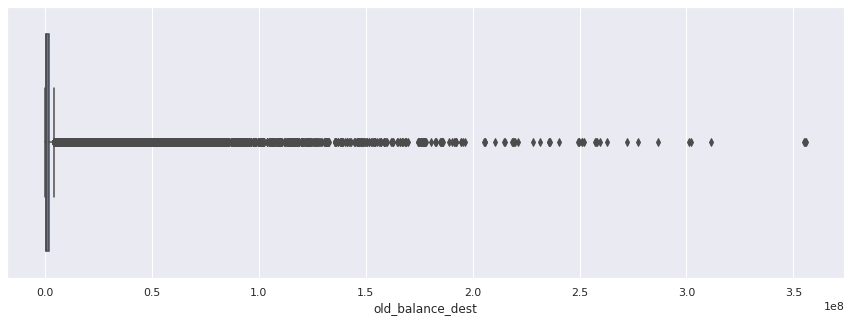

In [ ]:
sns.boxplot( df.new_balance_dest );

In [148]:
ss_new_balance_dest = StandardScaler(  )
new_balance_dest_ss = ss_new_balance_dest.fit_transform( df.new_balance_dest.values.reshape( -1,1 ) )
df_temp.new_balance_dest = new_balance_dest_ss

pickle.dump( ss_new_balance_dest, open( '../models/ss_new_balance_dest.sav' , 'wb') )

### step

In [16]:
mms_step = MinMaxScaler(  )
step_mms = mms_step.fit_transform( df.step.values.reshape( -1,1 ) )
df_temp.step = step_mms

pickle.dump( mms_step, open( '../models/mms_step.sav' , 'wb') )

# CHECKPOINT

In [17]:
pickle.dump( df_temp, open( '../data/pickle/data_prepared.sav' , 'wb') )

In [18]:
data_prepared = pickle.load( open( '../data/pickle/data_prepared.sav' , 'rb' ) )

In [19]:
data_prepared.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1662374.0,3.248109e-01,0.190907,0.000000,0.207547,0.316712,0.446092,1.000000
amount,1662374.0,-5.052609e-17,1.000000,-0.357828,-0.264541,-0.165193,-0.012715,103.619521
old_balance_orig,1662374.0,7.881745e-18,1.000000,-0.183437,-0.183437,-0.182259,-0.064579,228.480855
new_balance_orig,1662374.0,1.386572e-17,1.000000,-0.100450,-0.100450,-0.100450,-0.100450,308.339594
old_balance_dest,1662374.0,-1.028944e-16,1.000000,-0.404156,-0.373698,-0.272174,0.007514,84.104814
new_balance_dest,1662374.0,-2.988652e-16,1.000000,-0.439293,-0.369152,-0.261776,0.015100,75.894399
is_fraud,1662374.0,2.964435e-03,0.054366,0.000000,0.000000,0.000000,0.000000,1.000000
is_flagged_fraud,1662374.0,8.421691e-06,0.002902,0.000000,0.000000,0.000000,0.000000,1.000000
cash_out,1662374.0,8.076317e-01,0.394161,0.000000,1.000000,1.000000,1.000000,1.000000
transfer,1662374.0,1.923683e-01,0.394161,0.000000,0.000000,0.000000,0.000000,1.000000
